In [ ]:
from Vae-model_VS import VariAutoEnco

from pathlib import Path, PurePath

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.optim
from torch.optim import Adam

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy

In [ ]:
def loss_fn(recon_x, x, mu, logvar):
# method to calculate loss

  bce = F.binary_cross_entropy(recon_x, x, size_average=False)

  #KL divergence
  kld = -0.5 * torch.sum(1 + logvar - torch.pow(mu,2) - torch.exp(logvar))

  return bce + kld

In [ ]:
def train(model, ba_si, max_epochs, lr):
  
  model.train() #sets the model in train mode
  
  data_loader = torch.utils.data.DataLoader(data, ba_si, shuffle=True)
  # to pass data to the model in batches of size ba_si

  optimiser = Adam(model.parameters(), lr=lr)
  #scheduler=torch.optim.lr_scheduler.StepLR(optimiser, step_size=10, gamma=.5)

  epoch_n_loss = [[],[]]

  for epoch in range(max_epochs):
    epoch_loss=0.0

    for ba_idx, (ba,_) in enumerate(data_loader):
      loss=0.0
      optimiser.zero_grad()
      ba=ba.to(device)
      (recon_x, mu, log_var) = model(ba)
      loss = loss_fn(recon_x, ba, mu, log_var)
      loss.backward()
      epoch_loss+=loss.item()
      optimiser.step()

    #scheduler.step()

    print(f'Epoch {1+epoch}', f'loss: {epoch_loss/len(data_loader.dataset)}')

    epoch_n_loss[0].append(epoch)
    epoch_n_loss[1].append(epoch_loss)

  # plotting loss curve
  plt.ylabel('average loss')
  plt.xlabel('epoch')
  plt.plot(epoch_n_loss[0],epoch_n_loss[1])
    

In [ ]:
def valid(model, ba_si):
  model.eval() #sets the model in evaluation mode
  data_loader = torch.utils.data.DataLoader(data, ba_si, shuffle=True)

  for count in range(2):
    print(f'\n Reconstruction # {1+count}')
    for idx, (X, _) in enumerate(data_loader):
      with torch.no_grad():
        recon_X,_,_ = model(X.to(device))

      plt.imshow(X.cpu()[0,:].T) #original image
      plt.show()
      plt.imshow(recon_X.cpu()[0,:].T, cmap='jet') #reconstructed image
      plt.show()

In [ ]:
def generate_synthetic_images(model):
  model.eval()

  print('\n Synthetic images:')

  for count in range(200):
    # generates 100 images
    z = torch.randn(1,128).to(device)
    # z is the latent space random variable
    with torch.no_grad():
      # generate images
      gen_im = model.decode(z.to(device))

    plt.imshow(gen_im.cpu()[0,:].T)
    plt.show()
    plt.figure()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

data = datasets.ImageFolder\
('/content/drive/MyDrive/Data-science_learnt_applied/Problems/Juliana_bio-acoustic_FiebergLab_UoM/Data/Tapir/Synthetic-clips_with-background',\
                            transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
# instantiate the model class
model = VariAutoEnco(128).to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 1 loss: 300644.63157894736
Epoch 2 loss: 306595.8210526316
Epoch 3 loss: 296036.4421052632
Epoch 4 loss: 288581.18947368424
Epoch 5 loss: 297501.7052631579
Epoch 6 loss: 294099.6736842105
Epoch 7 loss: 285933.06315789477
Epoch 8 loss: 289491.9157894737
Epoch 9 loss: 287339.3789473684
Epoch 10 loss: 285692.5578947368
Epoch 11 loss: 286811.22105263156
Epoch 12 loss: 284446.3789473684
Epoch 13 loss: 283326.4736842105
Epoch 14 loss: 283048.2
Epoch 15 loss: 282366.54736842104
Epoch 16 loss: 287272.24210526317
Epoch 17 loss: 283100.18947368424
Epoch 18 loss: 287953.5894736842
Epoch 19 loss: 281432.9789473684
Epoch 20 loss: 288743.4421052632
Epoch 21 loss: 281885.66315789474
Epoch 22 loss: 281345.86315789475
Epoch 23 loss: 282067.64210526313
Epoch 24 loss: 279592.05263157893
Epoch 25 loss: 280710.8842105263
Epoch 26 loss: 278106.1263157895
Epoch 27 loss: 279765.48421052634
Epoch 28 loss: 278470.84210526315
Epoch 29 loss: 276699.43157894735
Epoch 30 loss: 275996.3789473684
Epoch 31 loss:

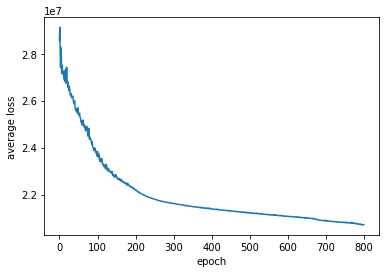

In [ ]:
# call train() method
train(model, 32, 800, .00001)